# Pomysł
Zrobić wykres https://datavizproject.com/data-type/proportional-area-chart/ korzystając z danych https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises ew z tego https://en.wikipedia.org/wiki/List_of_best-selling_video_game_franchises 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify 
import matplotlib.patches as patches
import plotly.express as px
import textwrap
import plotly.io as pio

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [2]:
df=pd.read_excel('franchise_worth.xlsx')
df

,franchise,year of inception,total revenue (est. US$),original medium,creator,owner
0,Pokémon,1996,115000000000,Video game,Satoshi Tajiri,The Pokémon Company; Nintendo
1,Mickey Mouse & Friends,1928,61200000000,Animated cartoon,Walt Disney; Ub Iwerks,The Walt Disney Company
2,Winnie the Pooh,1924,50200000000,Book,A. A. Milne; E. H. Shepard,The Walt Disney Company
3,Star Wars,1977,46700000000,Film,George Lucas,Lucasfilm (The Walt Disney Company)
4,Disney Princess,2000,45400000000,Animated films,Andy Mooney,The Walt Disney Company
5,Anpanman,1973,38300000000,Picture book,Takashi Yanase,Froebel-kan (Toppan Printing Co.)
6,Barbie,1987,36300000000,Television special,Ruth Handler,Mattel
7,Marvel Cinematic Universe,2008,35200000000,Film,Marvel Studios; Stan Lee; Jack Kirby,"Walt Disney Studios (The Walt Disney Company),..."
8,Wizarding World (Harry Potter),1997,34700000000,Novel,J. K. Rowling,"J. K. Rowling (books), Warner Bros. (Warner Br..."
9,Hello Kitty,1974,33500000000,Cartoon character,Yuko Shimizu; Shintaro Tsuji,Sanrio


In [3]:

# 2. Czyszczenie kolumny Revenue
# Funkcja usuwająca '$', 'billion', 'est.' i zamieniająca na liczby
def clean_revenue(val):
    if pd.isna(val): return 0
    val = str(val).lower()
    val = val.replace('$', '').replace('est.', '').replace('billion', '').replace(',', '').strip()
    val=float(val)
    val = val/1000000000
    try:
        return val
    except ValueError:
        return 0



/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_26283/733711817.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral')


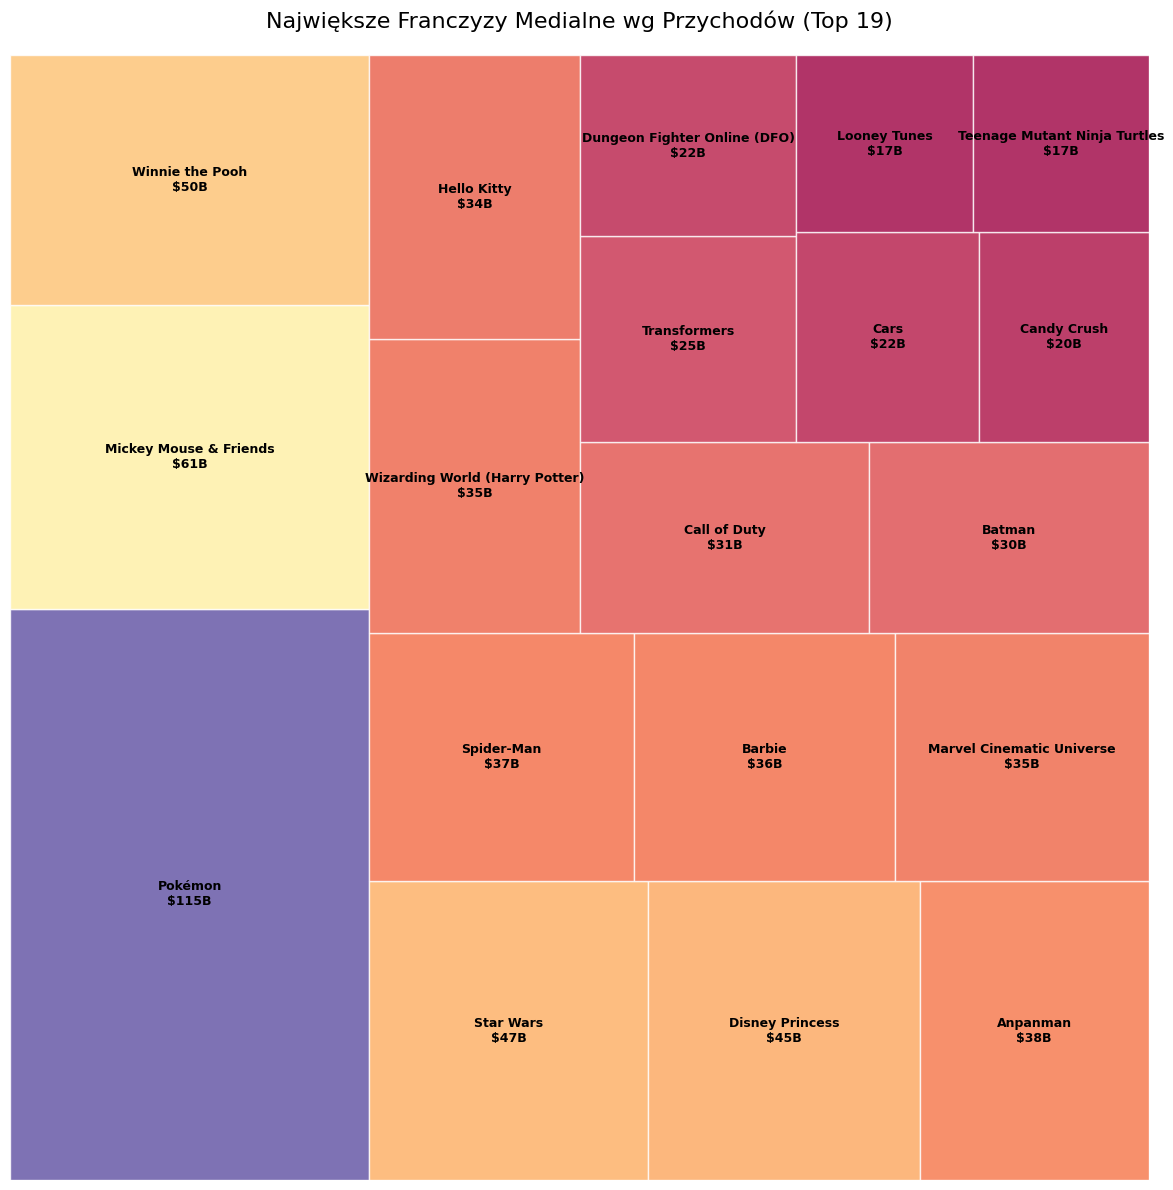

In [4]:

col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)

# Sortujemy malejąco (największe na górze) i bierzemy np. TOP 50, żeby wykres był czytelny
# Jeśli chcesz wszystkie, usuń .head(50)
df_plot = df.sort_values('clean_revenue', ascending=False).head(20)

# --- 3. Przygotowanie danych do wykresu ---
sizes = df_plot['clean_revenue'].values
labels = df_plot[col_franchise].values

# Etykiety z kwotą (np. "Pokémon\n$90B")
plot_labels = [f'{label}\n${value:,.0f}B' for label, value in zip(labels, sizes)]

# Kolory (Spectral wygląda dobrze przy dużej liczbie elementów)
cmap = plt.cm.get_cmap('Spectral')
norm = plt.Normalize(min(sizes), max(sizes))
colors = [cmap(norm(value)) for value in sizes]

# --- 4. Rysowanie Treemapy ---
plt.figure(figsize=(12, 12)) # Kwadratowy rozmiar sprzyja kwadratowym kafelkom

squarify.plot(
    sizes=sizes,
    label=plot_labels,
    color=colors,
    alpha=0.8,
    bar_kwargs={'linewidth': 1, 'edgecolor': 'white'},
    text_kwargs={'fontsize': 9, 'color': 'black', 'weight': 'bold'}
)

plt.title(f'Największe Franczyzy Medialne wg Przychodów (Top {len(df_plot)})', fontsize=16, pad=20)
plt.axis('off')

plt.tight_layout()
plt.savefig('franchise_revenue_treemap.png')

In [5]:
col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)
df_plot = df.sort_values('clean_revenue', ascending=False).head(20)


In [6]:
color_map = {
    'Animated film': '#FFD700',  # złoty (jasny)
    'Video game': '#2F4F4F',    # ciemnoszary (ciemny)
    'Comic book': '#FF6347',    # pomidorowy
    'Book': '#8B4513',          # brązowy (ciemny)
    'Anime': '#E6E6FA'          # lawendowy (jasny)
}

fig = px.treemap(df_plot, path=['original medium', 'franchise'], values='clean_revenue', color='original medium', color_discrete_map=color_map)

fig.update_layout(title_text='Franchise Worth Sorted by Original Medium (Top 20)', title_x=0.5)


fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [7]:
col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)
df_plot = df.sort_values('clean_revenue', ascending=False).head(15)
df_plot['wrapped_label'] = df_plot['franchise'].apply(lambda x: '<br>'.join(textwrap.wrap(x, width=15)))
df_plot['revenue_text'] = df_plot['clean_revenue'].apply(lambda x: f'{x:.1f} B')


fig = px.treemap(df_plot, path=['franchise'], values='clean_revenue', custom_data=['revenue_text', 'wrapped_label'])

#fig.update_layout(title_text='Franchise Worth Sorted by Original Medium (Billions of $)', title_x=0.5)


fig.update_traces(
    # Używamy owiniętej nazwy zamiast oryginalnego label
    texttemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}",
    textposition="middle center",
    textfont_size=11 # Tutaj zmniejszasz czcionkę
)

fig.update_layout(
    # minsize=8 pozwoli na wyświetlenie nawet mniejszych napisów
    title_text='Franchise Worth in Billions of Dollars (Top 20)',
    title_x=0.5,
    uniformtext=dict(minsize=8, mode='show'),
    margin=dict(t=50, l=25, r=25, b=25)
)

#fig.update_traces(marker=dict(cornerradius=5))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [39]:
fig = px.treemap(
    df_plot, 
    px.Constant(" "),
    path=[px.Constant(" "), 'franchise'], 
    values='clean_revenue',
    custom_data=['revenue_text', 'wrapped_label'],
    color='clean_revenue', 
    color_continuous_scale='Reds',
    template='plotly_white', ###
)


fig.update_traces(
    # Używamy owiniętej nazwy zamiast oryginalnego label
    texttemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}",
    textposition="middle center",
    textfont_size=13,
    tiling=dict(packing='squarify'),
)


fig.update_layout(
    title_text='Franchise Worth (Top 20, US$)',
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,  
    height=800, 
    uniformtext=dict(minsize=10, mode='show'),

    coloraxis=dict(
        colorbar_title_text='Revenue<br>(B$)', # <br> łamie linię
        colorbar_title_side='top', # Tytuł nad paskiem
        colorbar_len=0.9,
        colorbar_yanchor="top", colorbar_y=1,
    )
    
)

fig.add_layout_image(
    dict(
        source='images/images/5.png',
        xref="paper", yref="paper", # Pozycjonowanie względem całego płótna
        x=1.01, y=0.11,  
        sizex=0.12, sizey=0.12, # Rozmiar obrazka (współczynnik 0-1)
        xanchor="left", yanchor="top", # Punkt zakotwiczenia obrazka
        layer="above" # Obrazek ma być na wierzchu
    )
)

#fig.write_image("franchise_worth.png") #trzeba mieć zainstalowane kaleido
fig.show()